<a href="https://colab.research.google.com/github/luizmv8080/aprendizaje-profundo/blob/main/Tarea2/T2_Eje_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

In [ ]:
#Cargamos los datos de load_digits que son menores a 2
digits = load_digits() 
zeros_ones = digits.target < 2
data = digits.images[zeros_ones]
labels = digits.target[zeros_ones]

In [ ]:
#Normalizamos las matrices de los datos
data = data / data.max()

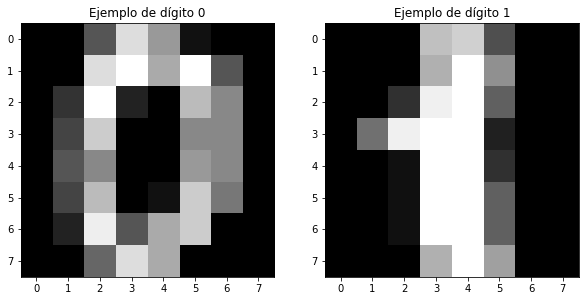

In [ ]:
#Inspeccionamos nuestros datos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(data[0], cmap = 'gray') 
axs[0].set_title('Ejemplo de dígito 0')
axs[1].imshow(data[1], cmap = 'gray') 
axs[1].set_title('Ejemplo de dígito 1')
plt.show() 

In [ ]:
#Convertimos las imagenes 2D de load_digits en itensores de tres canales
digits = np.stack((data,data,data)).transpose((1,2,3,0))
print(digits.shape)

(360, 8, 8, 3)


In [ ]:
a = np.zeros((3,2, 2))
a

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]]])

In [ ]:
digits[0].shape

(8, 8, 3)

In [ ]:
#Definimos nuestra funcion de convolucion 3D
def conv3d(I, W, b, stride = 1):
    #Como el numero de canales de las imagenes esta en la tercera coordenada
    #y como la de el vectos del filtro esta en la primera, debemos hacer que las
    #coordenadas de ambos coincidan mutuamente
    I = I.transpose((2,0,1))
    h_s = int(np.floor((I.shape[1] - W.shape[1]) / stride)) + 1
    w_s = int(np.floor((I.shape[2] - W.shape[2]) / stride)) + 1
    a = np.zeros((3,h_s, w_s))
    for d in range(3):
        for i in range(h_s):
            for j in range(w_s):
                I_m = I[d,i * stride:i * stride + W.shape[1], j * stride:j * stride + W.shape[2]]
                a[d,i, j] = (I_m * W[d,:,:]).sum() + b

    #Sumamos todas las convoluciones que se hicieron para cada dimension para que asi la salida
    #solo sea un tensor de un canal             
    return a[0,:,:]+a[1,:,:]+a[2,:,:]
   

In [ ]:
#Creamos un filtro de tres canales para convolucionarlo con la imagen
filter1 = np.zeros((3,3,3))
r = np.arange(3)
filter1[:, r, r] = 1
filter1 = filter1.transpose((1,2,0))

filter2 = np.zeros((3,3,3))
r2 = np.arange(3)
filter2[:, 1, r2] = 1
filter2 = filter2.transpose((1,2,0))

filter3 = np.zeros((3,3,3))
r3 = np.arange(3)
filter3[:, r3, 1] = 1
filter3 = filter3.transpose((1,2,0))

filter4 = np.zeros((3,3,3))
r4 = np.arange(3)
filter4[:,-1+r4, -r4] = 1
filter4 = filter4.transpose((1,2,0))

b = np.zeros(4)

filtros = [filter1,filter2,filter3,filter4]

In [ ]:
#Definimos una funcion para convolucionar cada uno de los filtros con la imagen
def multi_conv3d(I, filtros, b, stride = 1):
    activations = []
    for i in range(len(filtros)):
        activations.append(conv3d(I, filtros[i], b[i], stride = 1)) 
                       
    return np.array(activations)

In [ ]:
#Aplicamos la convolucion con cada uno de los filtros creados, una para el cero y otra para el 1
activations_0 = np.tanh(multi_conv3d(digits[0], filtros, b))
activations_1 = np.tanh(multi_conv3d(digits[1], filtros, b))

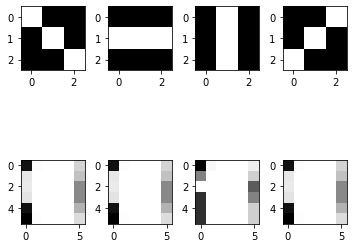

In [ ]:
#Desplegamos como se ven los filtros y su respectiva activacion
#Esta imagen de abajo es para el numero 1
for i in range(4):
    plt.subplot(3,4,i + 1)
    plt.imshow(filtros[i])
    plt.subplot(3,4,i + 9)
    plt.imshow(activations_1[i], cmap='gray')

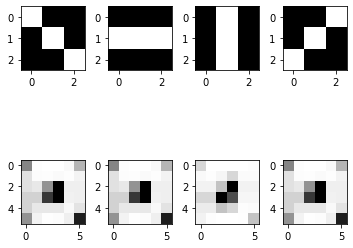

In [ ]:
#Activaciones para el numero 0
for i in range(4):
    plt.subplot(3,4,i + 1)
    plt.imshow(filtros[i])
    plt.subplot(3,4,i + 9)
    plt.imshow(activations_0[i], cmap='gray')

In [ ]:
#Se crean funciones para hacer un submuestreo maximo y por lo tanto
#usarla para hacer un multimuestreo maximo
def submuestreo_maximo(activations, block = (2,2)):
    H, W = activations.shape
    H_s = H // block[0]
    W_s = W // block[1]

    sub_a = np.zeros((H_s,W_s))
    max_x = activations.reshape((H * W_s, block[1])).max(axis = 1)
    sub_a = max_x.T.reshape((W_s, block[0], H_s)).max(axis = 1)
  
    return sub_a

def multi_submuestreo_maximo(activations, block = (2,2)):
    k = activations.shape[0]
    sub_a = []
    for i in range(k):
        sub_a.append(submuestreo_maximo(activations[i]))
                       
    return np.array(sub_a)

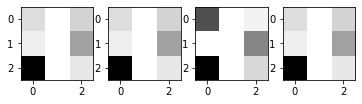

In [ ]:
#Mostramos el multimuestreo maximo para el numero 1
sub_a1 = multi_submuestreo_maximo(activations_1)
for i in range(4):  
    plt.subplot(2,4,i + 5)
    plt.imshow(sub_a1[i], cmap = 'gray')

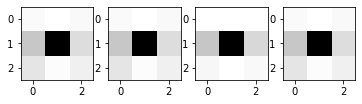

In [ ]:
#Mostramos el multimuestreo maximo para el numero cero
sub_a2 = multi_submuestreo_maximo(activations_0)
for i in range(4):  
    plt.subplot(2,4,i + 5)
    plt.imshow(sub_a2[i], cmap = 'gray')